In [1]:
# Import the Python modules we need
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Here is the url to the data
data_url = "https://www.ethnicity-facts-figures.service.gov.uk/crime-justice-and-the-law/policing/number-of-arrests/latest/downloads/number-of-arrests.csv"

In [4]:
uk_arrests = pd.read_csv(data_url)

In [5]:
uk_arrests.head()

,Measure,Time,Time_type,Ethnicity,Ethnicity_type,Gender,Gender_type,Age_Group,Age_Group_type,Geography,Geography_type,Number of arrests,"Population by ethnicity, gender, and PFA (based on 2011 Census)","Rate per 1,000 population by ethnicity, gender, and PFA","Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)",Notes
0,Number of arrests,2006/07,Financial year,Asian,ONS 2001 5+1,Female,Male/Female,10 - 17 years,Arrest age group categories,Avon and Somerset,Police Force Area,10,N/A for individual age groups,N/A for individual age groups,N/A for individual age groups,NaN
1,Number of arrests,2006/07,Financial year,Asian,ONS 2001 5+1,Female,Male/Female,10 - 17 years,Arrest age group categories,Bedfordshire,Police Force Area,25,N/A for individual age groups,N/A for individual age groups,N/A for individual age groups,NaN
2,Number of arrests,2006/07,Financial year,Asian,ONS 2001 5+1,Female,Male/Female,10 - 17 years,Arrest age group categories,Cambridgeshire,Police Force Area,9,N/A for individual age groups,N/A for individual age groups,N/A for individual age groups,NaN
3,Number of arrests,2006/07,Financial year,Asian,ONS 2001 5+1,Female,Male/Female,10 - 17 years,Arrest age group categories,Cheshire,Police Force Area,-,N/A for individual age groups,N/A for individual age groups,N/A for individual age groups,NaN
4,Number of arrests,2006/07,Financial year,Asian,ONS 2001 5+1,Female,Male/Female,10 - 17 years,Arrest age group categories,Cleveland,Police Force Area,4,N/A for individual age groups,N/A for individual age groups,N/A for individual age groups,NaN


In [6]:
uk_arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218592 entries, 0 to 218591
Data columns (total 16 columns):
 #   Column                                                                                                                     Non-Null Count   Dtype 
---  ------                                                                                                                     --------------   ----- 
 0   Measure                                                                                                                    218592 non-null  object
 1   Time                                                                                                                       218592 non-null  object
 2   Time_type                                                                                                                  218592 non-null  object
 3   Ethnicity                                                                                                                  2

In [13]:
ethnicity = sorted(uk_arrests["Ethnicity"].value_counts().index.to_list())

In [12]:
pfa = uk_arrests["Geography"].value_counts().index

In [14]:
df = uk_arrests[["Time", 
                 "Gender",
                 "Ethnicity",
                 "Geography",
                 "Age_Group",
                  " Number of arrests ",
                 "Population by ethnicity, gender, and PFA (based on 2011 Census)",
                 "Rate per 1,000 population by ethnicity, gender, and PFA",
                 "Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)"
                 ]]

In [15]:
df = uk_arrests.iloc[:, [1, 3, 5, 7, 9, 11, 12, 13]]

df.head()

,Time,Ethnicity,Gender,Age_Group,Geography,Number of arrests,"Population by ethnicity, gender, and PFA (based on 2011 Census)","Rate per 1,000 population by ethnicity, gender, and PFA"
0,2006/07,Asian,Female,10 - 17 years,Avon and Somerset,10,N/A for individual age groups,N/A for individual age groups
1,2006/07,Asian,Female,10 - 17 years,Bedfordshire,25,N/A for individual age groups,N/A for individual age groups
2,2006/07,Asian,Female,10 - 17 years,Cambridgeshire,9,N/A for individual age groups,N/A for individual age groups
3,2006/07,Asian,Female,10 - 17 years,Cheshire,-,N/A for individual age groups,N/A for individual age groups
4,2006/07,Asian,Female,10 - 17 years,Cleveland,4,N/A for individual age groups,N/A for individual age groups


In [19]:
df.rename(columns={" Number of arrests ": "Arrests"}, inplace=True)
df.rename(columns={"Rate per 1,000 population by ethnicity, gender, and PFA": "Rate"}, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218592 entries, 0 to 218591
Data columns (total 8 columns):
 #   Column                                                           Non-Null Count   Dtype 
---  ------                                                           --------------   ----- 
 0   Time                                                             218592 non-null  object
 1   Ethnicity                                                        218592 non-null  object
 2   Gender                                                           218592 non-null  object
 3   Age_Group                                                        218592 non-null  object
 4   Geography                                                        218592 non-null  object
 5   Arrests                                                          218592 non-null  object
 6   Population by ethnicity, gender, and PFA (based on 2011 Census)  218592 non-null  object
 7   Rate                                   

/Users/danielrutland/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
df["Arrests"] = df["Arrests"].str.replace(",", "")

/Users/danielrutland/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df["Arrests"] = pd.to_numeric(df["Arrests"], errors="coerce")

/Users/danielrutland/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df["Arrests"]

0           10.0
1           25.0
2            9.0
3            NaN
4            4.0
           ...  
218587    2906.0
218588    2711.0
218589    2532.0
218590    2289.0
218591    2144.0
Name: Arrests, Length: 218592, dtype: float64

In [24]:
df["Rate"] = pd.to_numeric(df["Rate"], errors="coerce")
df["Rate"]

/Users/danielrutland/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
218587    9.0
218588    8.0
218589    7.0
218590    7.0
218591    6.0
Name: Rate, Length: 218592, dtype: float64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218592 entries, 0 to 218591
Data columns (total 8 columns):
 #   Column                                                           Non-Null Count   Dtype  
---  ------                                                           --------------   -----  
 0   Time                                                             218592 non-null  object 
 1   Ethnicity                                                        218592 non-null  object 
 2   Gender                                                           218592 non-null  object 
 3   Age_Group                                                        218592 non-null  object 
 4   Geography                                                        218592 non-null  object 
 5   Arrests                                                          143928 non-null  float64
 6   Population by ethnicity, gender, and PFA (based on 2011 Census)  218592 non-null  object 
 7   Rate                          

In [29]:
df_agg = df[(df["Gender"] == "All") &
            (df["Age_Group"] == "All") &
            (df["Geography"] == "All")]

df_agg.head(20)

,Time,Ethnicity,Gender,Age_Group,Geography,Arrests,"Population by ethnicity, gender, and PFA (based on 2011 Census)",Rate
56952,2006/07,Asian,All,All,All,69591.0,"3,820,390",18.0
56953,2006/07,Black,All,All,All,105145.0,"1,864,890",56.0
56954,2006/07,Mixed,All,All,All,40882.0,"1,224,400",33.0
56955,2006/07,Other,All,All,All,19408.0,"956,837",20.0
56956,2006/07,Unreported,All,All,All,106349.0,N/A,NaN
56957,2006/07,White,All,All,All,1133468.0,"48,209,395",24.0
56958,2007/08,Asian,All,All,All,74755.0,"3,820,390",20.0
56959,2007/08,Black,All,All,All,109206.0,"1,864,890",59.0
56960,2007/08,Mixed,All,All,All,40726.0,"1,224,400",33.0
56961,2007/08,Other,All,All,All,21103.0,"956,837",22.0


In [41]:
grouped = df_agg.groupby(["Time","Ethnicity"])["Arrests"].sum()
grouped["2017/18"]
rate = df_agg.groupby(["Time","Ethnicity"])["Rate"].mean()
rate["2016/17"]

Ethnicity
All                                           14.0
Any other asian                               17.0
Any other black background                    69.0
Any other ethnic group                        19.0
Any other mixed/multiple ethnic background    25.0
Any other white background                    23.0
Asian                                         14.0
Bangladeshi                                   16.0
Black                                         38.0
Black African                                 28.0
Black Caribbean                               40.0
Chinese                                        4.0
Indian                                         8.0
Mixed                                         20.0
Mixed White and Asian                          7.0
Mixed White and Black African                 16.0
Mixed White and Black Caribbean               29.0
Other                                         13.0
Pakistani                                     16.0
Unreported           

In [43]:
df_agg.groupby(["Ethnicity","Time"])["Rate"].mean()["Black"]

Time
2006/07    56.0
2007/08    59.0
2008/09    60.0
2009/10    60.0
2010/11    61.0
2011/12    55.0
2012/13    47.0
2013/14    46.0
2014/15    45.0
2015/16    44.0
2016/17    38.0
2017/18    35.0
Name: Rate, dtype: float64

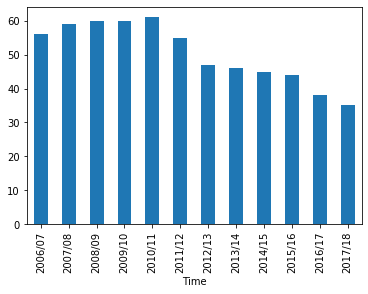

In [45]:
df_agg.groupby(["Ethnicity","Time"])["Rate"].mean()["Black"].plot.bar()

In [48]:
df_agg.groupby(["Time","Ethnicity"])["Rate"].mean().unstack()

Ethnicity,All,Any other asian,Any other black background,Any other ethnic group,Any other mixed/multiple ethnic background,Any other white background,Asian,Bangladeshi,Black,Black African,...,Mixed,Mixed White and Asian,Mixed White and Black African,Mixed White and Black Caribbean,Other,Pakistani,Unreported,White,White British,White Irish
Time,,,,,,,,,,,,,,,,,,,,,
2006/07,26.0,18.0,64.0,28.0,33.0,21.0,18.0,22.0,56.0,39.0,...,33.0,12.0,29.0,52.0,20.0,24.0,NaN,24.0,24.0,26.0
2007/08,26.0,21.0,70.0,30.0,36.0,28.0,20.0,24.0,59.0,42.0,...,33.0,12.0,28.0,50.0,22.0,25.0,NaN,24.0,24.0,27.0
2008/09,26.0,23.0,79.0,29.0,38.0,31.0,21.0,25.0,60.0,42.0,...,33.0,11.0,27.0,49.0,22.0,25.0,NaN,24.0,24.0,28.0
2009/10,25.0,23.0,82.0,28.0,37.0,36.0,20.0,25.0,60.0,43.0,...,33.0,12.0,28.0,48.0,21.0,25.0,NaN,23.0,22.0,25.0
2010/11,24.0,24.0,87.0,28.0,38.0,34.0,21.0,26.0,61.0,45.0,...,33.0,12.0,29.0,49.0,20.0,25.0,NaN,22.0,22.0,25.0
2011/12,22.0,23.0,82.0,26.0,35.0,33.0,19.0,24.0,55.0,40.0,...,31.0,10.0,28.0,45.0,18.0,22.0,NaN,20.0,19.0,23.0
2012/13,19.0,20.0,72.0,24.0,30.0,31.0,17.0,21.0,47.0,35.0,...,27.0,9.0,23.0,40.0,16.0,22.0,NaN,18.0,17.0,21.0
2013/14,18.0,21.0,72.0,23.0,29.0,30.0,17.0,21.0,46.0,35.0,...,25.0,9.0,22.0,38.0,15.0,21.0,NaN,17.0,16.0,21.0
2014/15,17.0,20.0,72.0,21.0,28.0,28.0,16.0,20.0,45.0,33.0,...,24.0,8.0,20.0,35.0,15.0,19.0,NaN,15.0,14.0,18.0


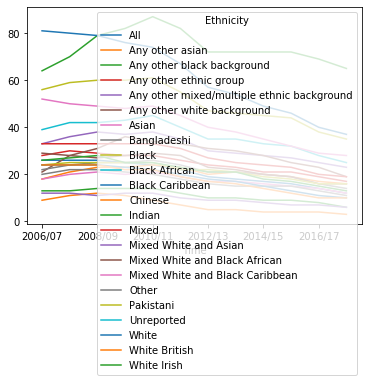

In [49]:
df_agg.groupby(["Time","Ethnicity"])["Rate"].mean().unstack().plot()

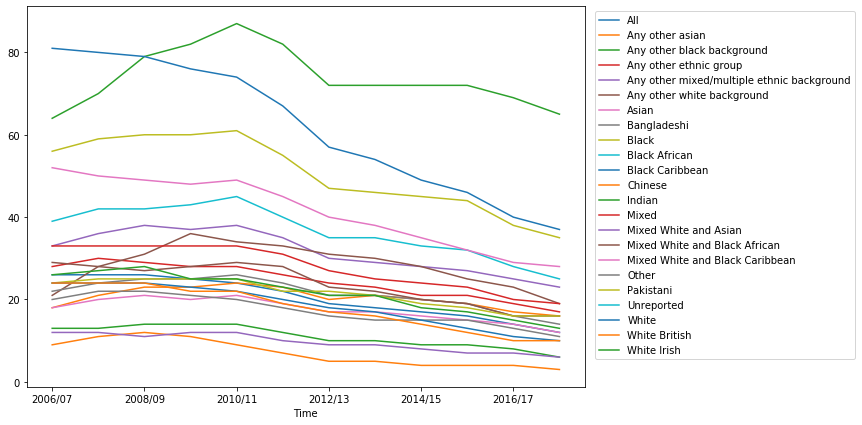

In [52]:
fig, ax = plt.subplots(figsize=(10, 7))
df_agg.groupby(["Time", "Ethnicity"])["Rate"].mean().unstack().plot(ax=ax)
plt.legend(bbox_to_anchor=(1.01,1))

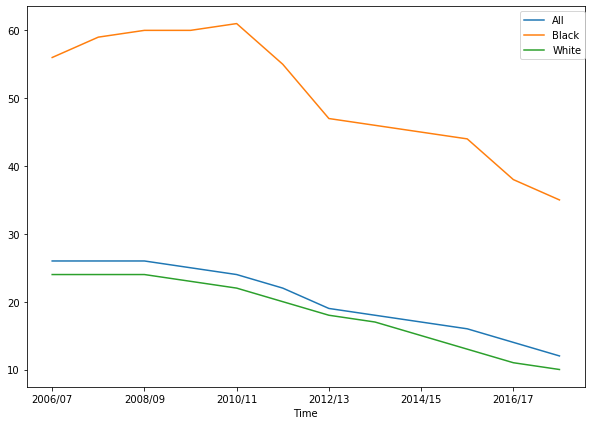

In [55]:
fig, ax = plt.subplots(figsize=(10, 7))
rate.unstack()[["All","Black","White" ]].plot(ax=ax)
plt.legend(bbox_to_anchor=(1.01,1))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


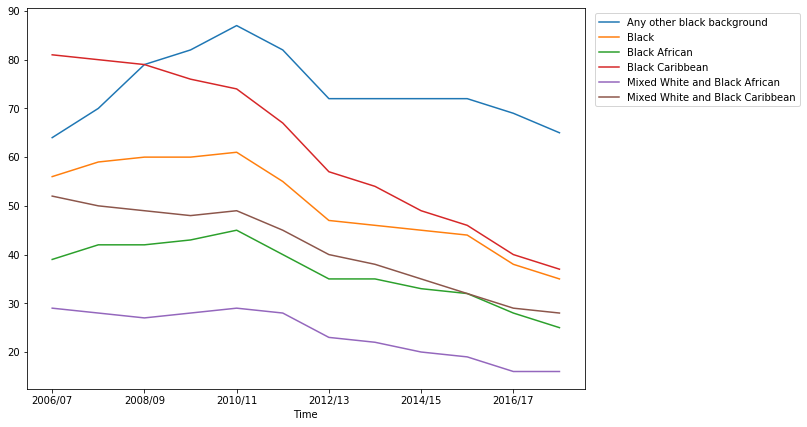

In [58]:
fig, ax = plt.subplots(figsize=(10, 7))
rate.unstack()[[x for x in ethnicity if "lack" in x]].plot(ax=ax)
plt.legend(bbox_to_anchor=(1.01,1))
plt.ylabel("UK Arrests for Black Ethnicities")
plt.savefig("category_ethnicity_black.eps", format="eps")

In [59]:
df_new= df[(df["Gender"] == "Male") &
            (df["Age_Group"] == "All") &
            (df["Geography"] == "All")]
df_new.head()

,Time,Ethnicity,Gender,Age_Group,Geography,Arrests,"Population by ethnicity, gender, and PFA (based on 2011 Census)",Rate
56809,2006/07,Asian,Male,All,All,63570.0,"1,934,129",33.0
56811,2006/07,Black,Male,All,All,90146.0,"898,200",100.0
56813,2006/07,Mixed,Male,All,All,33170.0,"611,533",54.0
56815,2006/07,Other,Male,All,All,16425.0,"498,596",33.0
56817,2006/07,Unreported,Male,All,All,88529.0,N/A,NaN


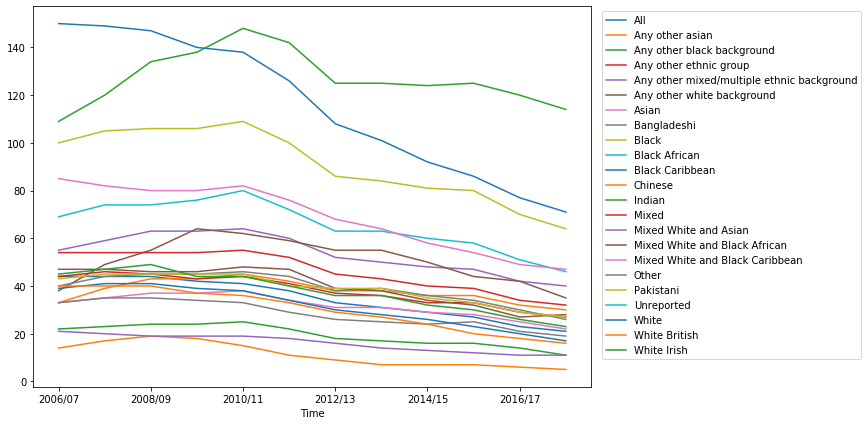

In [61]:
fig, ax = plt.subplots(figsize=(10, 7))
df_new.groupby(["Time", "Ethnicity"])["Rate"].mean().unstack().plot(ax=ax)
plt.legend(bbox_to_anchor=(1.01,1))

In [62]:
print(uk_arrests.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218592 entries, 0 to 218591
Data columns (total 16 columns):
 #   Column                                                                                                                     Non-Null Count   Dtype 
---  ------                                                                                                                     --------------   ----- 
 0   Measure                                                                                                                    218592 non-null  object
 1   Time                                                                                                                       218592 non-null  object
 2   Time_type                                                                                                                  218592 non-null  object
 3   Ethnicity                                                                                                                  2

In [68]:
geo = uk_arrests.loc[(uk_arrests['Time'] == '2006/07') &
                     (uk_arrests['Gender'] == 'All') &
                     (uk_arrests['Age_Group'] == 'All') &
                     (uk_arrests['Ethnicity'] == 'All')]

geo_black = uk_arrests.loc[(uk_arrests['Time'] == '2006/07') &
                     (uk_arrests['Gender'] == 'All') &
                     (uk_arrests['Age_Group'] == 'All') &
                     (uk_arrests['Ethnicity'] == 'Black')]
geo = geo[['Geography', ' Number of arrests ']]
geo_black = geo_black[['Geography', ' Number of arrests ']]
print(geo)

                  Geography  Number of arrests 
190080                  All           1,474,843
190116    Avon and Somerset              33,740
190117         Bedfordshire              15,814
190118       Cambridgeshire              18,692
190119             Cheshire              21,575
190120            Cleveland              21,732
190121              Cumbria              13,458
190122           Derbyshire              21,029
190123   Devon and Cornwall              29,282
190124               Dorset              18,510
190125               Durham              25,294
190126          Dyfed-Powys              13,479
190127                Essex              33,782
190128      Gloucestershire              15,415
190129   Greater Manchester              89,510
190130                Gwent              15,839
190131            Hampshire              45,315
190132        Hertfordshire              22,884
190133           Humberside              23,917
190134                 Kent             

In [74]:
# Let's merge the two datasets now
merged = pd.merge(geo, geo_black, left_on='Geography', right_on='Geography', suffixes=('Total', 'Black'))

# Nice, we need to get rid of the 'All' row though as we don't need this
merged = merged.loc[merged['Geography'] != 'All']

# Let's replace the N/A entries with 0
merged[' Number of arrests Black'] = merged[' Number of arrests Black'].str.replace('N/A', '0')

# Since the 'Number of arrests' column is a string with commas in, we need to change that quickly!
merged[' Number of arrests Total'] = merged[' Number of arrests Total'].str.replace(',', '').astype(float)
merged[' Number of arrests Black'] = merged[' Number of arrests Black'].str.replace(',', '').astype(float)

# Then let's add a column to the geo dataframe that has the proportion of black arrests.
merged['Proportion of black arrests'] = merged[' Number of arrests Black'] / merged[' Number of arrests Total']
merged

,Geography,Number of arrests Total,Number of arrests Black,Proportion of black arrests
1,Avon and Somerset,33740.0,1812.0,0.053705
2,Bedfordshire,15814.0,1745.0,0.110345
3,Cambridgeshire,18692.0,718.0,0.038412
4,Cheshire,21575.0,237.0,0.010985
5,Cleveland,21732.0,260.0,0.011964
6,Cumbria,13458.0,38.0,0.002824
7,Derbyshire,21029.0,579.0,0.027533
8,Devon and Cornwall,29282.0,140.0,0.004781
9,Dorset,18510.0,373.0,0.020151
10,Durham,25294.0,50.0,0.001977


In [75]:
!pip install geopandas

     |████████████████████████████████| 962 kB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 9.9 MB/s eta 0:00:01
     |████████████████████████████████| 13.0 MB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 13.9 MB 23.0 MB/s eta 0:00:01


ValueError: could not convert string to float: ' N/A '